<a href="https://colab.research.google.com/github/grzn20/PROYECTOS-PORTAFOLIO/blob/main/LSTM_eurusd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Este codigo una red neuronal artificial llamada memoria a largo plazo o LSTM que usaremos para predecir el precio de cierre del par de divisas EURUSD
# y nosotros usaremos el precio a partir del año 2000.

#Librerias

In [163]:
#importamos librerias
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import  MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt


#Limpieza y Procesamiento de los datos

In [301]:
#todos nuestro datos fueron extraidos de https://es.investing.com/currencies/eur-usd-historical-data
#cargamos la data
df = pd.read_csv('/content/drive/MyDrive/datasets/Datos históricos EUR_USD.csv')
df

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,01.03.2019,"1,1377","1,1372","1,1410","1,1353","156,73K","0,05%"
1,28.02.2019,"1,1371","1,1371","1,1421","1,1357","160,78K","0,02%"
2,27.02.2019,"1,1369","1,1396","1,1404","1,1360","151,86K","-0,16%"
3,26.02.2019,"1,1387","1,1366","1,1404","1,1343","142,08K","0,25%"
4,25.02.2019,"1,1359","1,1338","1,1369","1,1323","130,22K","0,14%"
...,...,...,...,...,...,...,...
4995,07.01.2000,"1,0292","1,0327","1,0333","1,0252",NaN,"-0,31%"
4996,06.01.2000,"1,0324","1,0325","1,0419","1,0275",NaN,"0,08%"
4997,05.01.2000,"1,0316","1,0295","1,0404","1,0282",NaN,"0,04%"
4998,04.01.2000,"1,0312","1,0244","1,0347","1,0213",NaN,"0,46%"


In [302]:
#verificamos los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Fecha     5000 non-null   object
 1   Último    5000 non-null   object
 2   Apertura  5000 non-null   object
 3   Máximo    5000 non-null   object
 4   Mínimo    5000 non-null   object
 5   Vol.      42 non-null     object
 6   % var.    5000 non-null   object
dtypes: object(7)
memory usage: 273.6+ KB


Tenemos en todas las columnas como Dtype: object y necesitamos que los datos esten como numericos para su procesamiento. Tambien necesitamos que fecha esta como Datatime.

In [303]:
#Convertimos la columna 'Fecha' de string a Datetime indicando que el primer valor es el día
df['Fecha'] = pd.to_datetime(df['Fecha'],errors='raise', dayfirst=True, yearfirst=False, utc=None, format=None, exact=True, unit=None, infer_datetime_format=False, origin='unix', cache=True)
df.info()
df['Fecha']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     5000 non-null   datetime64[ns]
 1   Último    5000 non-null   object        
 2   Apertura  5000 non-null   object        
 3   Máximo    5000 non-null   object        
 4   Mínimo    5000 non-null   object        
 5   Vol.      42 non-null     object        
 6   % var.    5000 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 273.6+ KB


0      2019-03-01
1      2019-02-28
2      2019-02-27
3      2019-02-26
4      2019-02-25
          ...    
4995   2000-01-07
4996   2000-01-06
4997   2000-01-05
4998   2000-01-04
4999   2000-01-03
Name: Fecha, Length: 5000, dtype: datetime64[ns]

In [304]:
#Transformamos las columnas 'Ultimo', 'Apertura', 'Maximo', 'Minimo' a Float
for i in range(5000):
    numero = df['Último'][i]
    df['Último'][i] = numero.replace(',','.')
df['Último'] = pd.to_numeric(df['Último'])

for i in range(5000):
    numero = df['Apertura'][i]
    df['Apertura'][i] = numero.replace(',','.')
df['Apertura'] = pd.to_numeric(df['Apertura'])

for i in range(5000):
    numero = df['Máximo'][i]
    df['Máximo'][i] = numero.replace(',','.')
df['Máximo'] = pd.to_numeric(df['Máximo'])

for i in range(5000):
    numero = df['Mínimo'][i]
    df['Mínimo'][i] = numero.replace(',','.')
df['Mínimo'] = pd.to_numeric(df['Mínimo'])

df.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     5000 non-null   datetime64[ns]
 1   Último    5000 non-null   float64       
 2   Apertura  5000 non-null   float64       
 3   Máximo    5000 non-null   float64       
 4   Mínimo    5000 non-null   float64       
 5   Vol.      42 non-null     object        
 6   % var.    5000 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 273.6+ KB


In [305]:
#Eliminamos las columnas que no usariamos como Vol por la cantidad de datos faltantes y % var. por que no sera de uso para nuestro modelo neuronal
df = df.drop(columns=['Vol.'])
df = df.drop(columns=['% var.'])
df

,Fecha,Último,Apertura,Máximo,Mínimo
0,2019-03-01,1.1377,1.1372,1.1410,1.1353
1,2019-02-28,1.1371,1.1371,1.1421,1.1357
2,2019-02-27,1.1369,1.1396,1.1404,1.1360
3,2019-02-26,1.1387,1.1366,1.1404,1.1343
4,2019-02-25,1.1359,1.1338,1.1369,1.1323
...,...,...,...,...,...
4995,2000-01-07,1.0292,1.0327,1.0333,1.0252
4996,2000-01-06,1.0324,1.0325,1.0419,1.0275
4997,2000-01-05,1.0316,1.0295,1.0404,1.0282
4998,2000-01-04,1.0312,1.0244,1.0347,1.0213


In [306]:
df = df.sort_values('Fecha',ascending=True)
df.head()

,Fecha,Último,Apertura,Máximo,Mínimo
4999,2000-01-03,1.0265,1.0052,1.0282,1.0050
4998,2000-01-04,1.0312,1.0244,1.0347,1.0213
4997,2000-01-05,1.0316,1.0295,1.0404,1.0282
4996,2000-01-06,1.0324,1.0325,1.0419,1.0275
4995,2000-01-07,1.0292,1.0327,1.0333,1.0252


In [307]:
df = df.set_index(df['Fecha'], drop=True, append=False, inplace=False, verify_integrity=False)
df = df.drop(columns=['Fecha'])
df

,Último,Apertura,Máximo,Mínimo
Fecha,,,,
2000-01-03,1.0265,1.0052,1.0282,1.0050
2000-01-04,1.0312,1.0244,1.0347,1.0213
2000-01-05,1.0316,1.0295,1.0404,1.0282
2000-01-06,1.0324,1.0325,1.0419,1.0275
2000-01-07,1.0292,1.0327,1.0333,1.0252
...,...,...,...,...
2019-02-25,1.1359,1.1338,1.1369,1.1323
2019-02-26,1.1387,1.1366,1.1404,1.1343
2019-02-27,1.1369,1.1396,1.1404,1.1360


In [308]:
#Cantidad de filas y columnas que usaremos para trabajar
df.shape

(5000, 4)

<function matplotlib.pyplot.show(*args, **kw)>

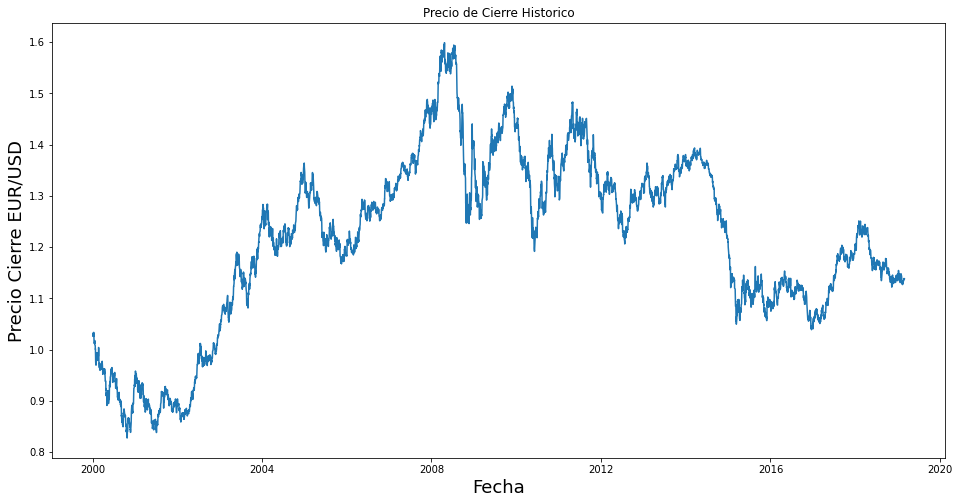

In [309]:
#visualizamos los precios de cierre
plt.figure(figsize=(16,8))
plt.title('Precio de Cierre Historico')
plt.plot(df['Último'])
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Precio Cierre EUR/USD', fontsize=18)
plt.show

In [310]:
#convertiremos la columna Ultimo como una Dataframe independiente
data = df.filter(['Último'])
#lo convertiremos en valores para Numpy
dataset = data.values
#obtendremos el numero de filas para el entrenamiento del modelo
training_data_len = math.ceil(len(dataset) * .8)
training_data_len 

4000

In [311]:
#data a escala 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.25819831],
       [0.26429034],
       [0.26480881],
       ...,
       [0.40129618],
       [0.40155541],
       [0.40233312]])

In [312]:
#Crearemos el data set de entrenamiento
#Crearemos el entrenamiento a escala
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.25819831, 0.26429034, 0.26480881, 0.26584576, 0.26169799,
       0.25716137, 0.26727155, 0.26429034, 0.25677252, 0.2404407 ,
       0.23914452, 0.24082955, 0.23966299, 0.24653273, 0.23564485,
       0.23395982, 0.22462735, 0.22540506, 0.20894362, 0.19144524,
       0.18431627, 0.18807518, 0.1933895 , 0.21127673, 0.20155541,
       0.19922229, 0.20544394, 0.21607259, 0.20466623, 0.20686973,
       0.19624109, 0.19974076, 0.20674012, 0.20816591, 0.20635126,
       0.20751782, 0.22903435, 0.22773817, 0.21490603, 0.19079715,
       0.18742709, 0.17809462, 0.18988983, 0.17770577, 0.17187297,
       0.17122489, 0.17174336, 0.17303953, 0.18029812, 0.17589112,
       0.17809462, 0.18276086, 0.18172391, 0.18690862, 0.18807518,
       0.18911212, 0.17731692, 0.173558  , 0.18729747, 0.19416721])]
[0.18068697342838624]

[array([0.25819831, 0.26429034, 0.26480881, 0.26584576, 0.26169799,
       0.25716137, 0.26727155, 0.26429034, 0.25677252, 0.2404407 ,
       0.23914452, 0.24082955, 0.23

In [313]:
#Convertimos x_train y y_train en arrays Numpy
x_train, y_train = np.array(x_train), np.array(y_train)

In [314]:
#remodelar la data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(3940, 60, 1)

In [315]:
#Construccion del modelo LSTM
model = Sequential()
model.add(LSTM(300, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(300, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

In [316]:
#Compilamos el modelo 
model.compile(optimizer='adam', loss='mean_squared_error')

In [317]:
#Entrenamiento del modelo
model.fit(x_train, y_train, batch_size=1, epochs=1)
#batch_size la cantidad de datos a generar
#.fit es para entrenamiento
#epochs son las epocas emuladas

3940/3940 [==============================] - 672s 170ms/step - loss: 0.0013


In [318]:
#Creamos la data de prueba
#Generaremos un nuevo array que contengan los valores desde el 3940 al 5000
test_data = scaled_data[training_data_len - 60:, :]
#Creamos los dataset para X_test y y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [319]:
#Convertir la data a array numpy
x_test = np.array(x_test)

In [320]:
#Convertimos x_test de Bidimencional a Tridimecional para el modelo
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [321]:
# Generar la prediccion del valor de los datos
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [322]:
#Generar nuestro RMSE
rmse = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))
rmse

0.006508519078911596

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


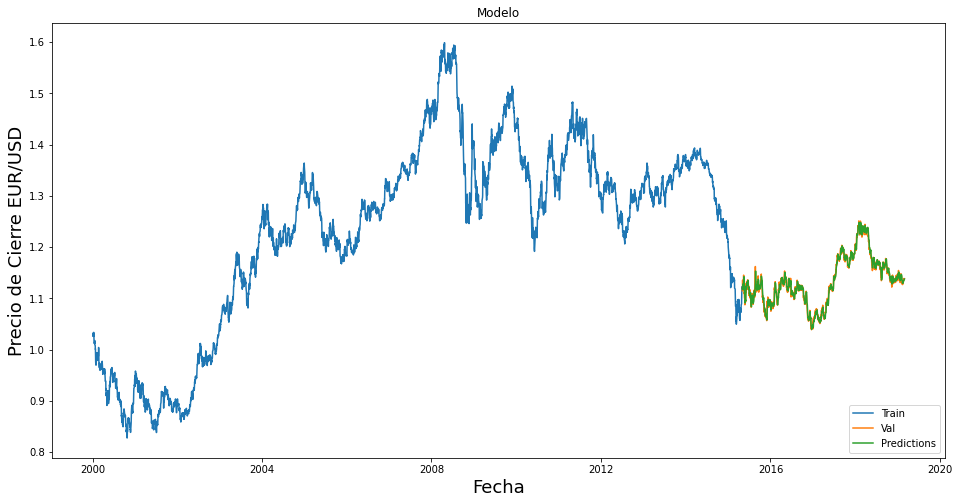

In [323]:
#Trazamos los datos
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualizar el modelo
plt.figure(figsize=(16,8))
plt.title('Modelo')
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Precio de Cierre EUR/USD', fontsize=18)
plt.plot(train['Último'])
plt.plot(valid[['Último','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [324]:
valid

,Último,Predictions
Fecha,,
2015-05-04,1.1146,1.119437
2015-05-05,1.1186,1.117197
2015-05-06,1.1353,1.117460
2015-05-07,1.1267,1.126834
2015-05-08,1.1204,1.127613
...,...,...
2019-02-25,1.1359,1.134584
2019-02-26,1.1387,1.135593
2019-02-27,1.1369,1.137636


In [325]:
#obtenemos datos actuales
eurusd = pd.read_csv('/content/drive/MyDrive/datasets/Datos históricos EUR_USDact.csv')
eurusd['Fecha'] = pd.to_datetime(eurusd['Fecha'],errors='raise', dayfirst=True, yearfirst=False, utc=None, format=None, exact=True, unit=None, infer_datetime_format=False, origin='unix', cache=True)
eurusd = eurusd.sort_values('Fecha',ascending=True)
eurusd = eurusd.set_index(eurusd['Fecha'], drop=True, append=False, inplace=False, verify_integrity=False)
eurusd = eurusd.drop(columns=['Fecha'])
for i in range(1507):
    numero = eurusd['Último'][i]
    eurusd['Último'][i] = numero.replace(',','.')
eurusd['Último'] = pd.to_numeric(eurusd['Último'])
#Creamos un nuevo dataframe
new_df = eurusd.filter(['Último'])
# convertirmos la data de los ultimos 90 dias de dataframe a array
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
#creamos el X_test vacio
X_test = []
#Agregamos los ultimos 60 dias
X_test.append(last_60_days_scaled)
#Convertimos a numpy
X_test = np.array(X_test)
#redimensionamos la data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [326]:
#escala predctiva
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[0.9723942]]


0.9723942 seria el precio de cierre para la fecha 11-10-2022